# RBIG Demo

In [1]:
%matplotlib inline

import numpy as np
import warnings
from time import time
from rbig import RBIG, generate_data, plot_toydata
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

warnings.filterwarnings('ignore') # get rid of annoying warnings

#### Toy Data

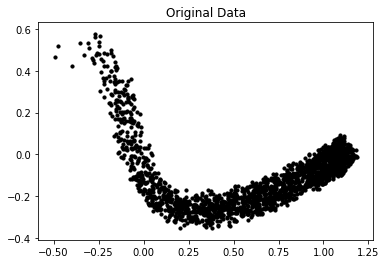

In [2]:
num_points = 2000
train_percent = 0.5
noise = 0.2
random_state = 1234

# generate random data cov - [0.5, 0.5 ; -0.5, 0.5]
x_data = generate_data(num_points=num_points,
                       noise=noise,
                       random_state=random_state)

# split the data into training and testing
x_train, x_test = train_test_split(x_data,
                                   train_size=train_percent,
                                   random_state=random_state)



# plot the toy data
plot_toydata(x_data, "Original Data")

## RBIG Fitting

#### Dev Notes:

The n_subsamples corresponds to the extra domain percentage input but this is not the case with the actual function used which can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer).

Time taken to fit RBIG Model to data: 6.1528 secs


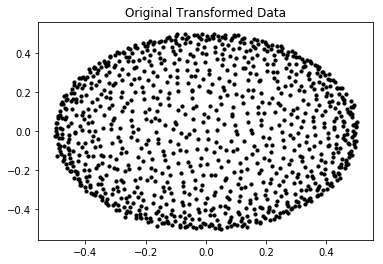

In [3]:
n_layers = 1000       # layers for transformation
n_quantiles = 1000    # number of 
n_subsamples = 1000   # number of points for gaussian dist

# Initialize RBIG Class
RBIG_model = RBIG(precision=n_quantiles, subsample=n_subsamples,
                  n_layers=n_layers, random_state=random_state)

# Fit Model to the data
t0 = time()

RBIG_model.fit(x_train);

t1 = time() - t0
print('Time taken to fit RBIG Model to data: {:.4f} secs'.format(t1))

# Plot the data
x_transformed = RBIG_model.data_transformed_

plot_toydata(x_transformed, 'Original Transformed Data')

### Transform New Data

Time taken to transform new data: 1.4167 secs


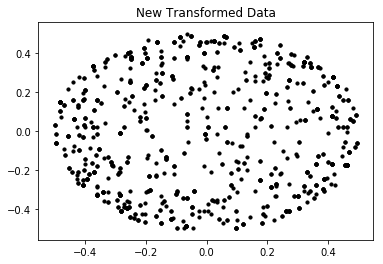

In [4]:
# transform the test data
t0 = time()

x_test_transformed = RBIG_model.transform(x_test)

t1 = time() - t0
print('Time taken to transform new data: {:.4f} secs'.format(t1))

# plot the data
plot_toydata(x_test_transformed, 'New Transformed Data')

### Synthesize New Data

Time taken to inverse-transform synthesize new random data: 0.6714 secs


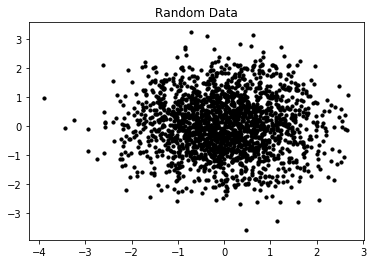

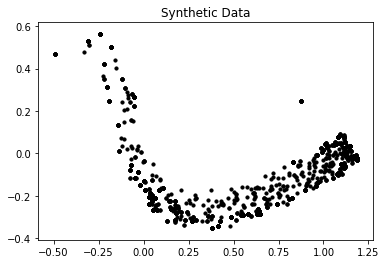

In [5]:
# create a random matrix with a normal distribution
generator = check_random_state(seed=random_state)
x_random = generator.randn(num_points, x_train.shape[1])

# use the inverse transform to synthesize
t0 = time()

x_synthetic = RBIG_model.inverse_transform(x_random)

t1 = time() - t0
print('Time taken to inverse-transform '
      + 'synthesize new random data: {:.4f} secs'.format(t1))

plot_toydata(x_random, 'Random Data')
plot_toydata(x_synthetic, 'Synthetic Data')